# Perturbed Random Walk
___

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline
%load_ext autoreload
%autoreload 1
%config InlineBackend.figure_formats = {'png', 'retina'}

## Simple Random Walk
For more details, see `simple-random-walk.ipynb`.

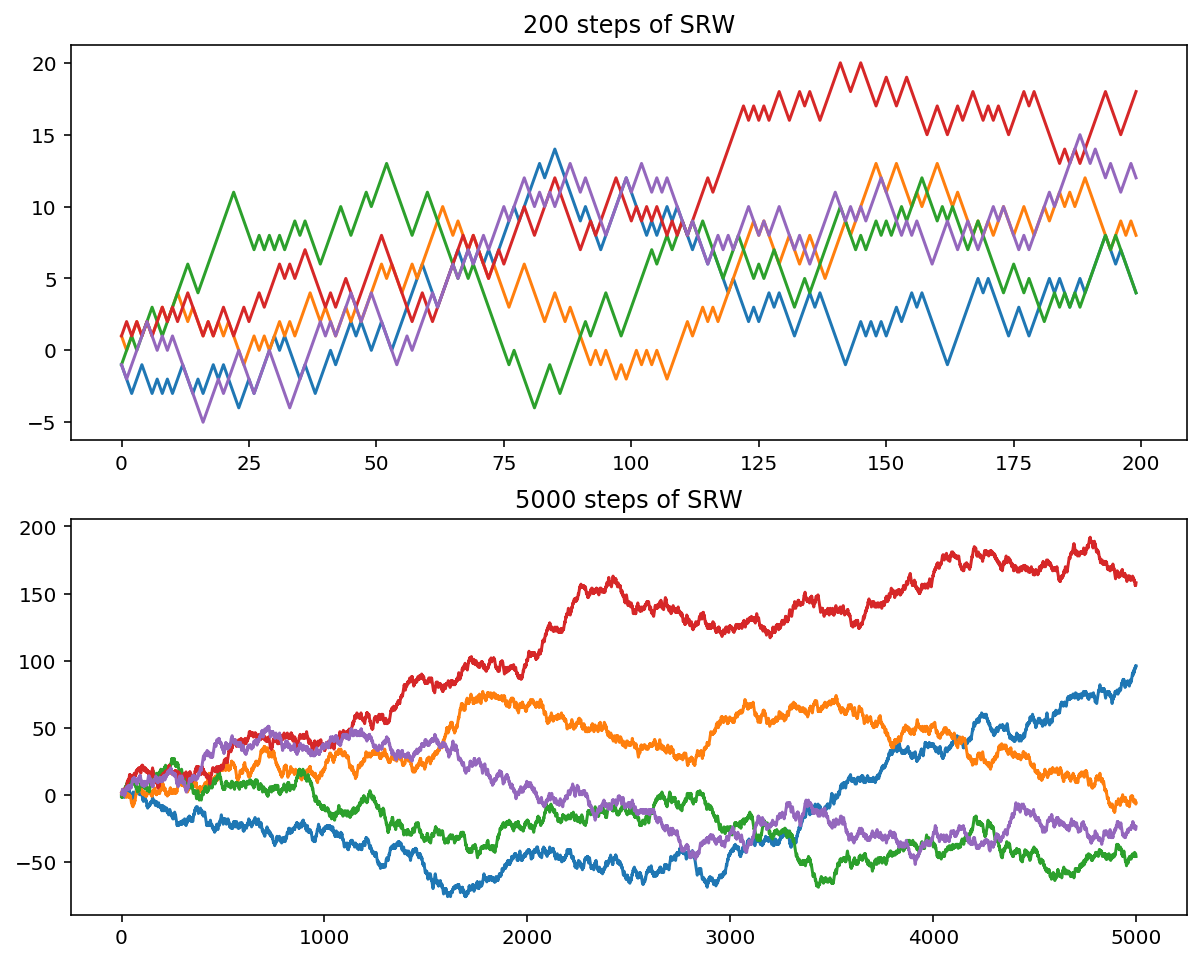

In [2]:
steps = [200, 5000]
num = 5

plt.figure(figsize=(10, 8))
for i, step in enumerate(steps, start=1):
    plt.subplot(2, 1, i)
    for _ in range(num):
        simples = []
        x = 0
        for _ in range(step):
            d = random.choices((-1, 1), weights=(1, 1))[0]
            x += d
            simples.append(x)
        plt.plot(simples)
    plt.title(f'{step} steps of SRW')
plt.show()

By the central limit theorem, SRW $S(n)$ converges in law to $N(0, \sqrt{n})$, or $S(n) / \sqrt{n}$ does to $N(0, 1)$. (I drew latter.)

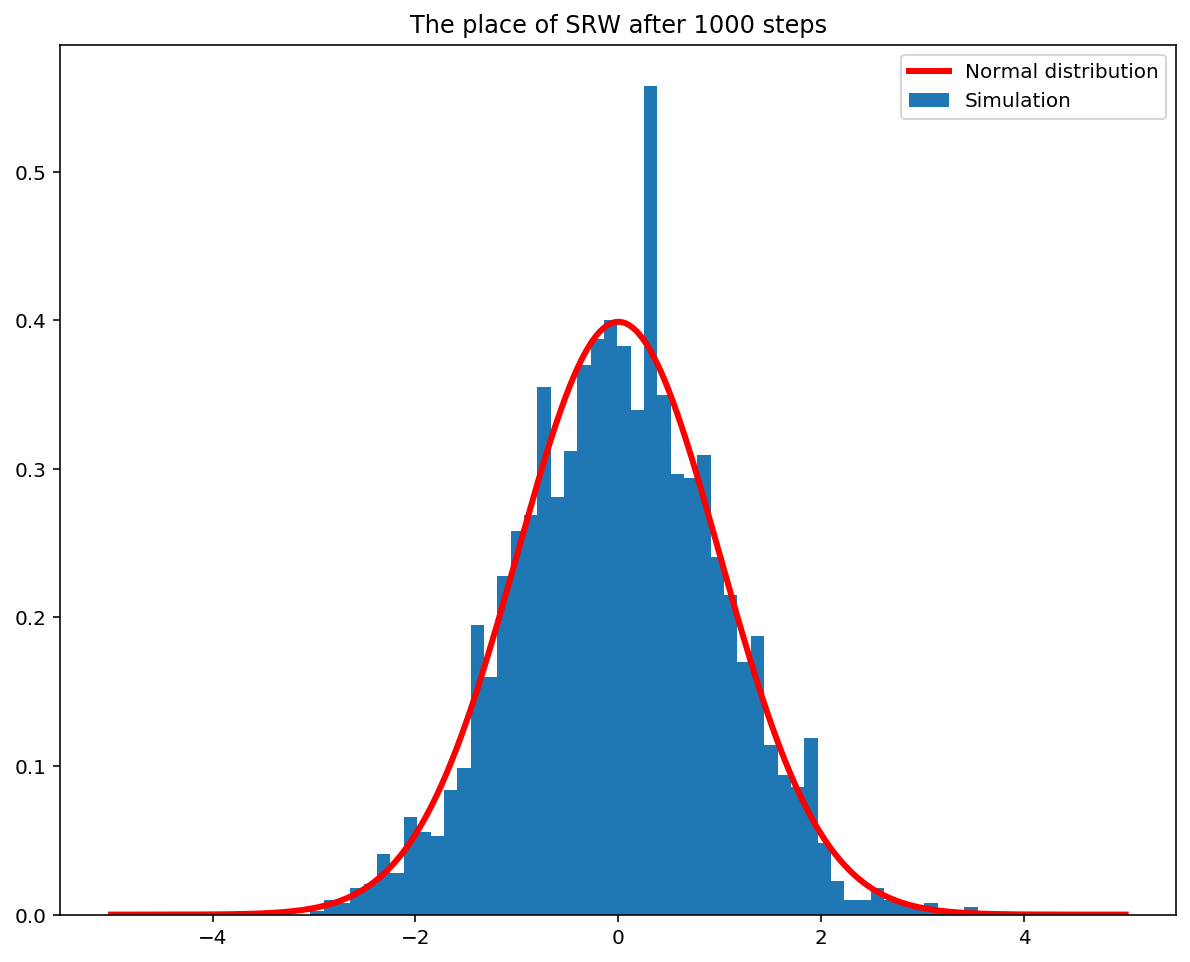

In [13]:
step = 1000 # n
num = 3000

plt.figure(figsize=(10, 8))
goals = []
for _ in range(num):
    y = 0
    for _ in range(step):
        d = random.choices((-1, 1), weights=(1, 1))[0]
        y += d
    goals.append(y / np.sqrt(step))
plt.hist(goals, bins=50, density=True, label='Simulation')

x = np.linspace(-5, 5, 1000)
normal = 1 / (np.sqrt(2 * np.pi)) * np.exp(- x**2  / 2)
plt.plot(x, normal, color='r', linewidth=3, label='Normal distribution')

plt.title(f'The place of SRW after {step} steps')
plt.legend()
plt.show()

## Perturbed Random Walk


### Periodic case
$$ P(S(n+1) = S(n) + 1 | S(n) \text{ is even}) = P(S(n+1) = S(n) - 1 | S(n) \text{ is odd}) = 0.9, $$
$$ P(S(n+1) = S(n) + 1 | S(n) \text{ is odd}) = P(S(n+1) = S(n) - 1 | S(n) \text{ is even}) = 0.1.$$

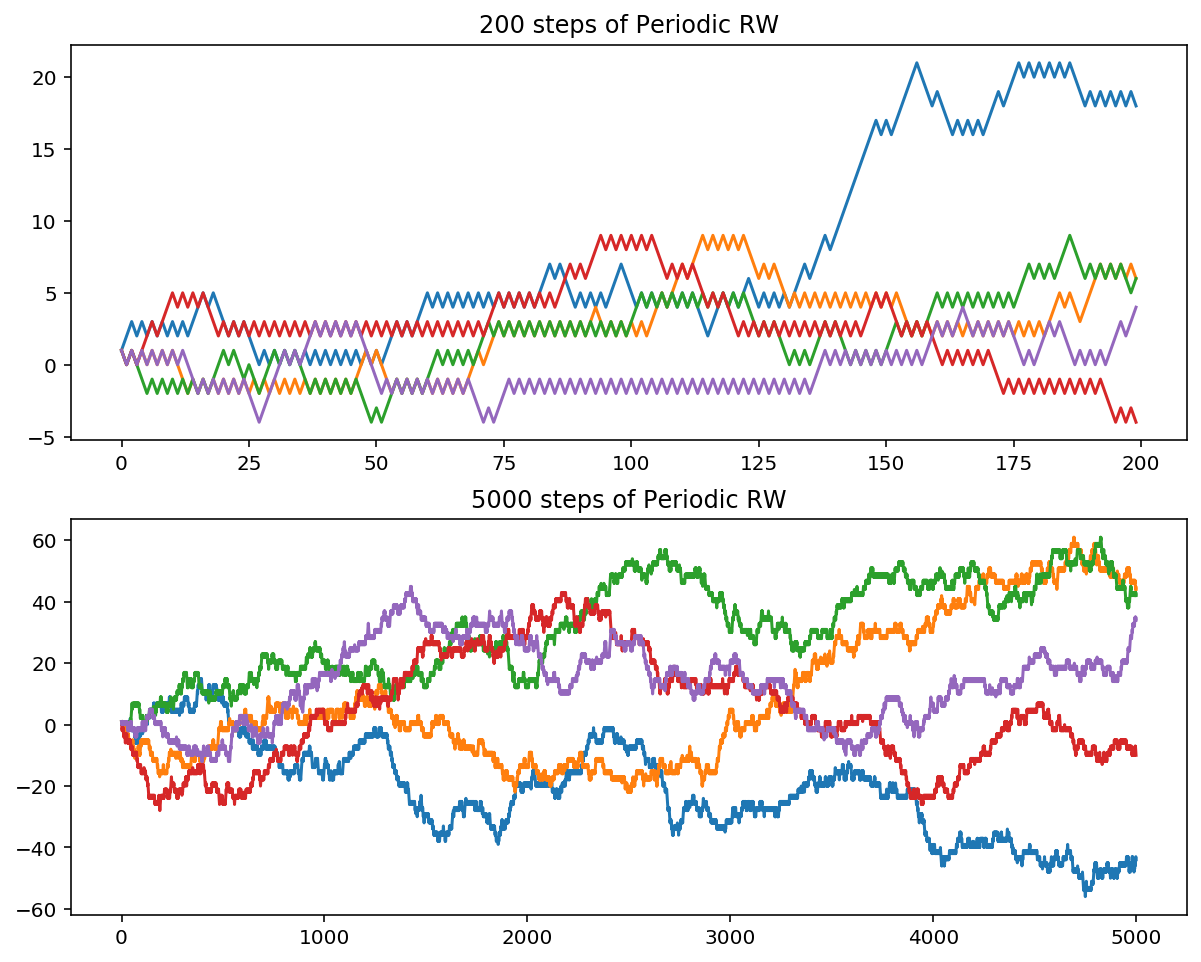

In [15]:
steps= [200, 5000]
num = 5

plt.figure(figsize=(10, 8))
for i, step in enumerate(steps, start=1):
    plt.subplot(2, 1, i)
    for _ in range(num):
        perturbs = []
        x = 0
        for __ in range(step):
            if x % 2 == 0:
                d = random.choices((-1, 1), weights=(1, 9))[0]
            else:
                d = random.choices((-1, 1), weights=(9, 1))[0]
            x += d
            perturbs.append(x)
        plt.plot(perturbs)
        plt.title(f'{step} steps of Periodic RW')

plt.show()

Compared to SRW, 

### Periodic case | step distance modified
I see $h(S(n))$, where
$$ h(2k) = 2k, \, h(2k+1) = 2k+0.2 \, \, (k \in \mathbb{Z}).$$

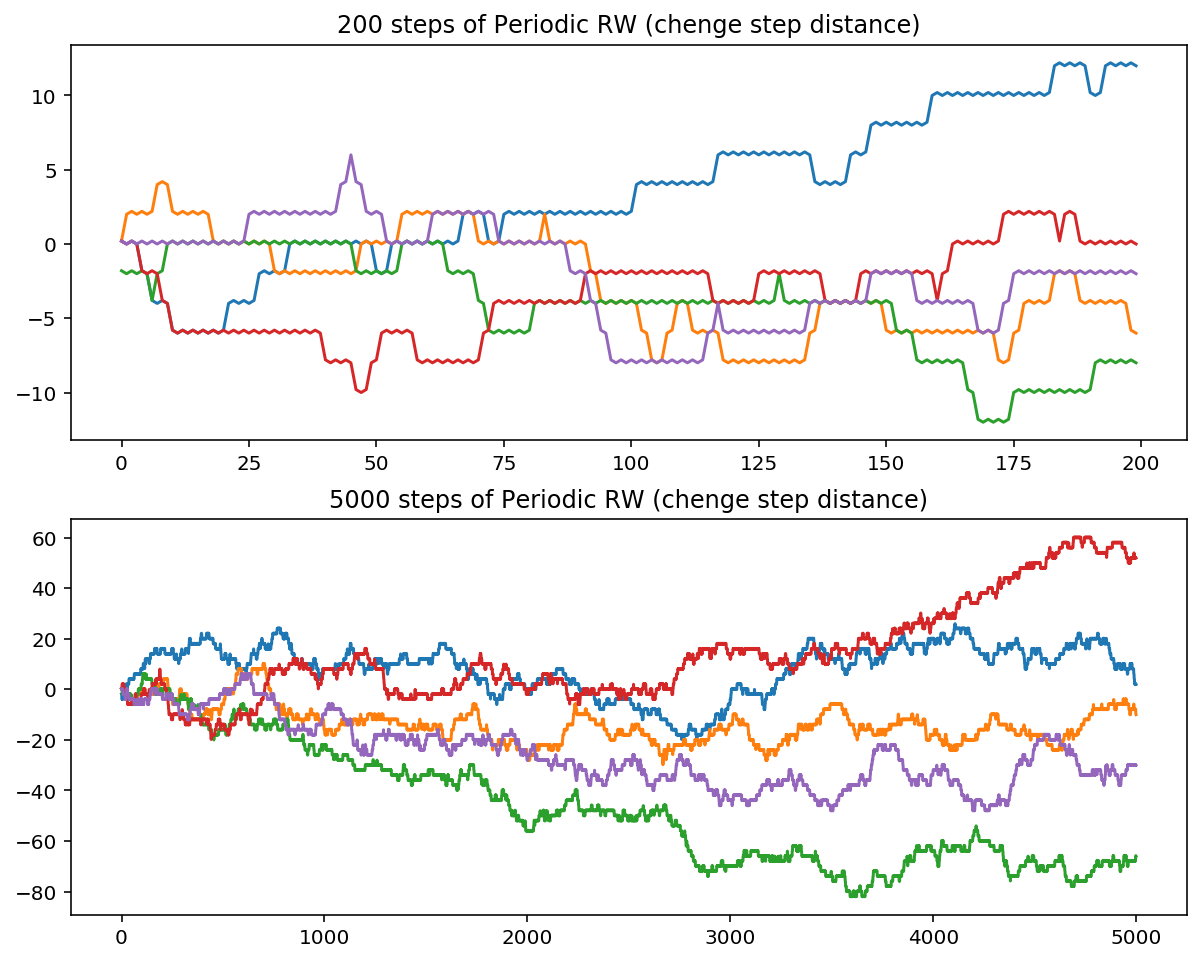

In [17]:
steps = [200, 5000]
num = 5

plt.figure(figsize=(10, 8))
for i, step in enumerate(steps, start=1):
    plt.subplot(2, 1, i)
    for _ in range(num):
        perturbs = []
        x = 0
        for __ in range(step):
            if x % 2 == 0:
                d = random.choices((-1, 1), weights=(1, 9))[0]
            else:
                d = random.choices((-1, 1), weights=(9, 1))[0]
            x += d
            if x % 2 == 0:
                perturbs.append(x)
            else:
                perturbs.append(x-0.8)
        plt.plot(perturbs)
        plt.title(f'{step} steps of Periodic RW (chenge step distance)')

plt.show()

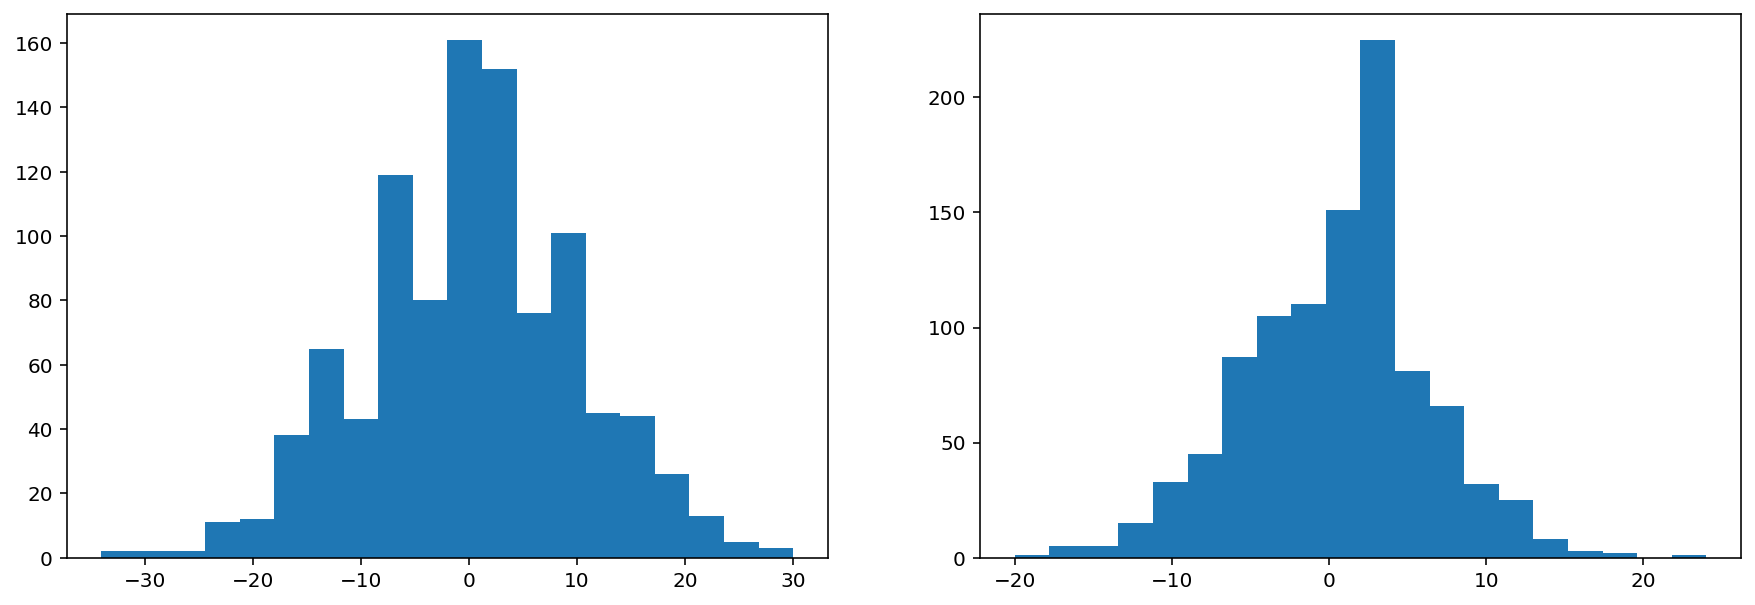

In [5]:
step = 100
num = 1000

plt.figure(figsize=(15, 5))
simples = []
# Simple
for _ in range(num):
    x = 0
    for __ in range(step):
        d = random.choices((-1, 1), weights=(1, 1))[0]
        x += d
    simples.append(x)
plt.subplot(1, 2, 1)
plt.hist(simples, bins=20)

perturbs = []
for _ in range(num):
    x = 0
    for __ in range(step):
        if x % 2 == 0:
            d = random.choices((-1, 1), weights=(1, 9))[0]
        else:
            d = random.choices((-1, 1), weights=(9, 1))[0]
        x += d
    perturbs.append(x)
    
plt.subplot(1, 2, 2)
plt.hist(perturbs, bins=20)
plt.show()